# Analysis of Seattle Collision Data

## 1. Introduction

### 1.1: Background

Driving a car always comes with the risk of an accident. Over 5 million car accidents occur every year in the United States of America. These accidents are in varying degrees of severity, with some only resulting in light injuries whereas others causing death.

Car accidents happen due to a variety of causes, be it traffic, or speeding, or even bad weather. These factors combine with the level of carelessness of the driver in deciding how severe or dangerous a car accident is.

### 1.2: Problem

The causes of accidents are extremely varied and thus we cannot account for all of them on our own whenever getting on a vehicle. Accidents result not only in a loss on the part of the occupants of the cars in terms of medical bills and injuries, but also involved insurance payments, loss of productivity and time. If an accident could be anticipated for and prevented before it occurs, a large amount of time and money would be saved, mainly for the occupants of the vehicle.

Thus the problem to be solved is: <b> Can the severity of a car accident be predicted? </b>

To do this, we need to answer the following questions:
<ol>
    <li> What and how much data is needed?
    <li> What factors must be taken into consideration?
    <li> How much influence do each of these factors have on the target of prediction?
    <li> What model is to be used?
    <li> How accurate is the model used?
</ol>

### 1.3: Interest

This problem would be of interest to people who regularly travel in their own vehicles, as learning of the possibility of an accident might induce them to be more careful while driving, avoiding injuries, damage or loss of life. The problem would also be of interest to the city traffic police department, so that they can gauge the possible severity of an accident and respond in kind to prevent it beforehand. Finally, insurance companies would also benefit from not having to pay auto or health insurance for preventable accidents.

## 2. Data

### 2.1: Source

The data used for this project is a database of the details of accidents in <b>Seattle City</b>, Washington, United States of America, including types and severity.<br>
The organization providing this data is <b>SDOT Traffic Management Division, Traffic Records Group</b> and the database is updated weekly.

A description of the data can be found <a href='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf'>here</a>. <br>
The data can be downloaded <a href='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'>here</a>.

### 2.2: Description

The data consists of 38 columns of which a majority can be dropped. Columns containing incident keys, police codes, lane and street keys are all dropped to narrow it down to relevant columns. Columns with large amounts of missing data, or columns which cannot be adjusted properly will be dropped.
The location, weather, fatalities, severity, speeding status, whether the driver was inattentive, whether the driver was under the influence, and the road and light conditions are among the relevant columns to the problem of predicting severity.

The data will be analysed for all relevant columns using visualization to determine the relationship with the severity. Then the relevant columns can be tested with multiple possible machine learning models with each model being evaluated using multiple metrics. Then finally the model with the best overall accuracy will be considered and used to predict the severity of an accident.

An example of this data would be an accident that happened on 25th April 2020 on NW 65th ST at a block. The dataset tells us it was of severity 1, meaning only property damage occured, and also tells us that it hit a parked car. The vehicle had 2 people in it with no pedestrians involved. The dataset also tells us that the weather was overcast, with the road being wet and that the lighting condition was dark with street lights on. We also know that the vehicle was not speeding.

## 3. Methodology

### 3.1: The Dataset

#### Dropping Columns

First, all columns which were descriptive, had police codes, or had incident keys were removed.
These were:
<ul>
<li>OBJECTID
<li>SEVERITYDESC
<li>INCKEY
<li>COLDETKEY
<li>REPORTNO
<li>STATUS
<li>INTKEY
<li>EXCEPTRSNCODE
<li>EXCEPTRSNDESC
<li>SDOT_COLCODE
<li>SDOT_COLDESC
<li>SDOTCOLNUM
<li>ST_COLCODE
<li>ST_COLDESC
<li>SEGLANEKEY
<li>CROSSWALKKEY
</ul>

SEVERITYCODE.1 was removed because the SEVERITYCODE column has the same data <br>
INCDTTM was removed in favor of INCDATE as INCDATE had more consistent values <br>
LOCATION was removed as X and Y hold the same information and it was repetitive <br>
PEDCOUNT and PEDCYLCOUNT have a majority of the data being 0, and thus they do not create much of an impact on the prediction of SEVERITYCODE. PERSONCOUNT also overlaps with these two fields, creating redundancy. Thus both PEDCOUNT and PEDCYLCOUNT are dropped. <br>

#### Replacing Missing Values

Next, the missing values for each column were tallied, and PEDROWNOTGRNT was dropped because it had a majority of it's values missing 

The following columns had no missing values: SEVERITYCODE, PERSONCOUNT, VEHCOUNT, INCDATE, HITPARKEDCAR

Then, the missing values in the remaining columns were replaced:
By the value with maximum frequency: ADDRTYPE, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND
COLLISIONTYPE was replaced with 'Other'
JUNCTIONTYPE was replaced with 'Unknown' as data is unknown
In the columns INATTENTIONIND and SPEEDING, the missing value means 'N' (No) as only values for 'Y' (Yes) are given

#### Cleaning Data

The dataset now had columns with no missing values. However, the existing data still had to be cleaned and organized

The rows with value 'Unknown' were dropped in the columns JUNCTIONTYPE, WEATHER, ROADCOND and LIGHTCOND

The LIGHTCOND field had repetitive data framed in multiple ways, and thus the repetitive data was replaced with a consistent category

The UNDERINFL field had values 0,1,N and Y. 0 and 1 were replaced with N and Y respectively.

#### Converting text to numbers where easily possible

In the columns SPEEDING, UNDERINFL, INATTENTIONIND, and HITPARKEDCAR:  the values N and Y were replaced with 0 and 1 respectively

#### Converting to proper datatype

Finally, all the columns were converted to proper datatypes (int, float, datetime or object)

#### List of Fields remaining in Dataset

<ul>
<li> SEVERITYCODE
<li> X
<li> Y
<li> ADDRTYPE
<li> COLLISIONTYPE
<li> PERSONCOUNT
<li> VEHCOUNT
<li> INCDATE
<li> JUNCTIONTYPE
<li> INATTENTIONIND
<li> UNDERINFL   
<li> WEATHER    
<li> ROADCOND    
<li> LIGHTCOND
<li> SPEEDING
<li> HITPARKEDCAR
</ul>

### 3.2: Creating Alternate Datasets

#### dfnumbers

This is the original dataset with all categorical variables converted to numerical variables for three purposes
<ol>
    <li> Building a proper correlation matrix to compare correlations
    <li> Building a Multiple Linear Regression model to analyse the data and check if the model would work
    <li> For effective usage during visualization
</ol>

The columns containing categorical variables were converted to numerical, being given whole number values from 1 to 10. These columns were WEATHER, ROADCOND, LIGHTCOND, ADDRTYPE, COLLISIONTYPE and JUNCTIONTYPE
The INCDATE column was dropped as it is not numerical in nature

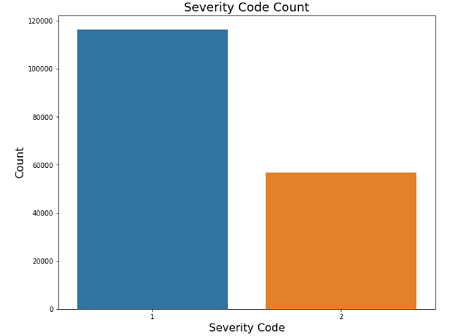

#### Data for Machine Learning

As seen from the visualization, the existing dataset was highly unbalanced, with around double the number of collisions of Severity Code 1, corresponding to property damage, than Severity Code 2, corresponding to Injury. This would result in a flawed or biased model, and so had to be fixed.<br>
The possible methods to fix this would be:
<ol>
    <li> Undersampling (choosing equal number of samples of each Severity Code randomly to generate a model)
    <li> Oversampling (creating random data of samples with Severity Code 2 to match the number of samples with Severity Code 1)
    <li> Building a biased model
</ol>

We shall attempt all three methods to check which one has the best accuracy.

For oversampling, a method called SMOTE was used from the library 'imbalanced-learn'. First a new dataframe titled 'dfoversampled' was created dropping the columns X and Y as location values would not need to be considered in the prediction, and were only used for visualization. Then SMOTE was used to generate samples of severity code 2 from the existing data. This dataframe was called newdf, and was then assigned column names.
This dataset had equal number of values (116458) of SEVERITYCODE 1 and 2. The contents of the dataframe were then rounded to integers to maintain categorical data and the datatype was changed to int64 from float64.

For undersampling, we do the processing before machine learning using the method 'NearMiss' from the library 'imbalanced-learn'. This method will directly give us two numpy arrays with the undersampled data. This results in an equal number of values (56629) of SEVERITYCODE 1 and 2. There is no further modification of the arrays required other than preprocessing.

For building a biased model, we will use the existing dataset: dfnumbers.


### 3.3: Data Analysis

#### Correlation Matrix

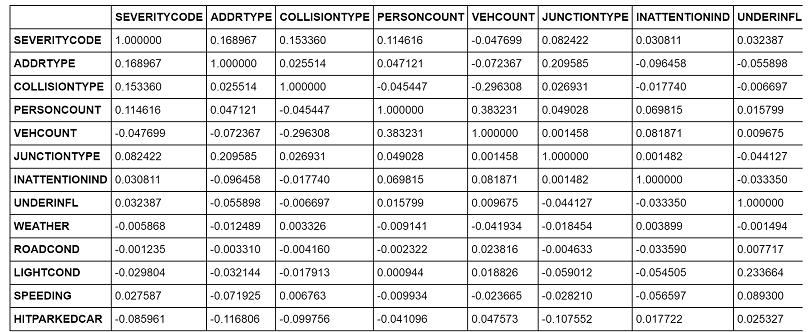

This correlation matrix was created on the dfnumbers dataset and shows that no two columns have a high postive or negative correlation. This is to be expected as there are only two possible values for SEVERITYCODE and a limited number of unique values in most columns. As the data is categorical and not continuous, it is very likely that there is no measurable direct correlation between the data.

#### Multiple Linear Regression

A multiple linear regression model was created on the dfnumbers dataset before and after balancing the data. In both cases, the model was extremely inaccurate, owing to the reasons explained above. The R2 score of both models was under 0.1, meaning that a multiple regression model would not effectively fit the data.
A visualization of both models is visible.

##### dfnumbers: 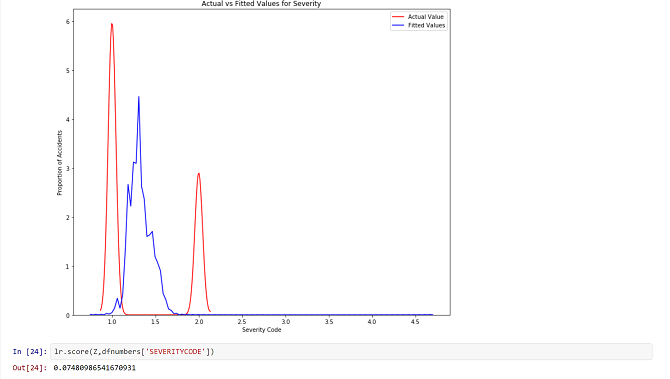

##### dfoversampled: 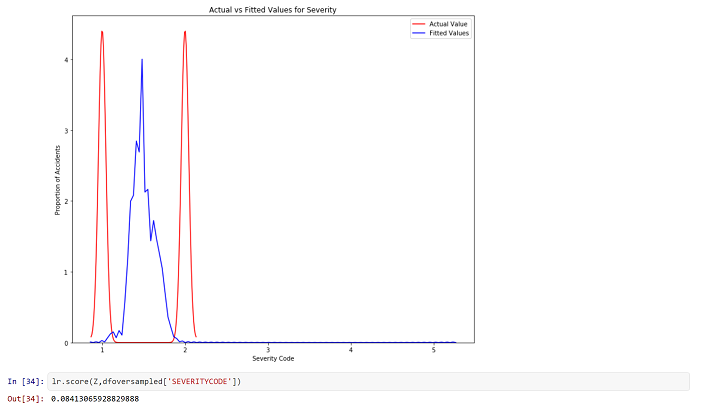

### 3.4 Data Visualization

#### Distribution of Data Values in each column

The following histogram matrix shows the numerical data distribution in each category.

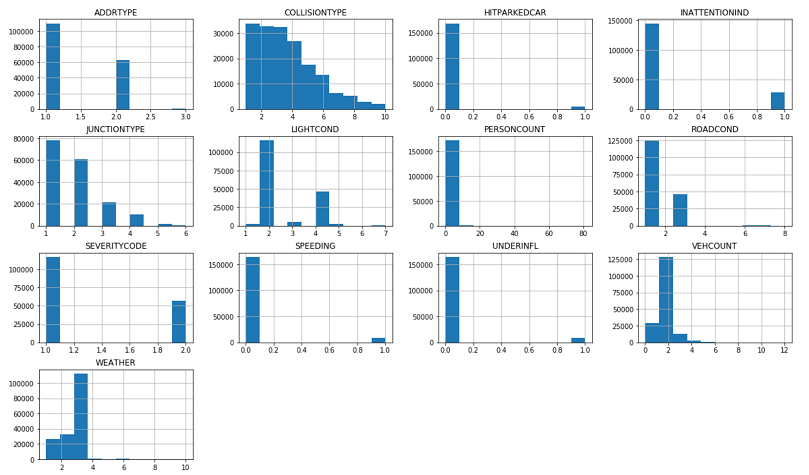

#### Distributions of Collisions by Year, Month and Day


##### Year: 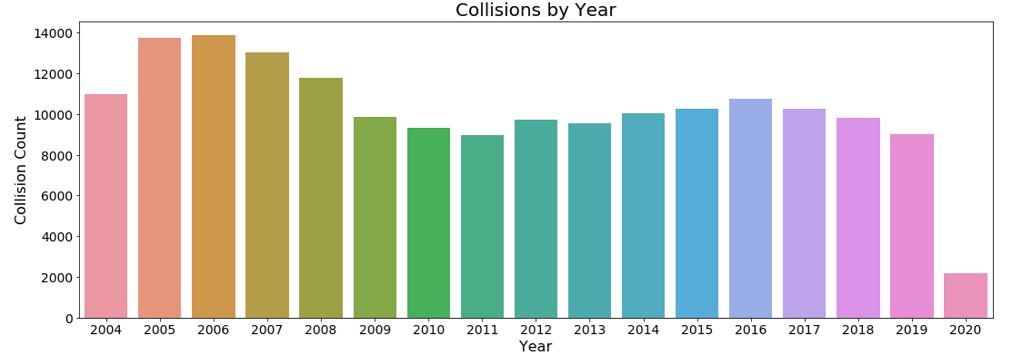

##### Month: 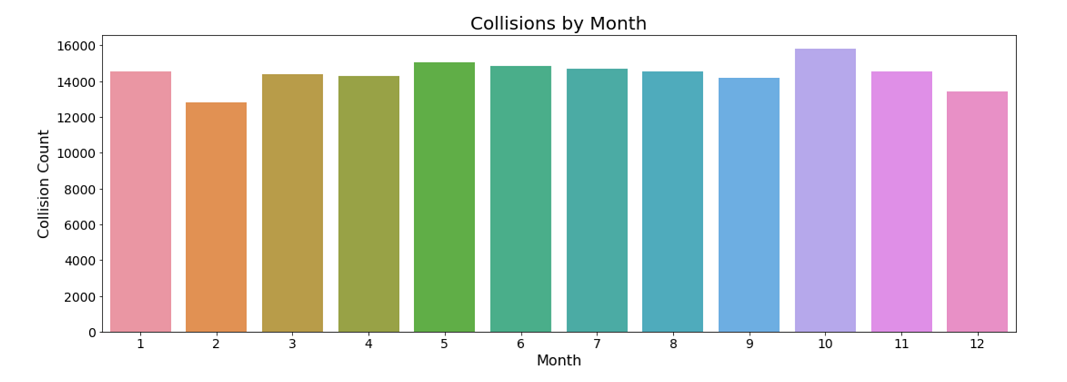

##### Day: 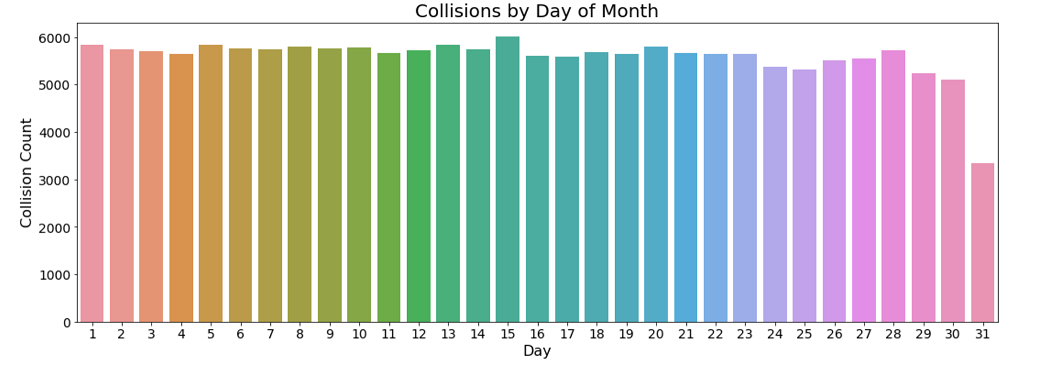

The bar graph shows an even distribution of collisions throughout every year, with a peak in 2006. However, the collisions in 2020 are considerably lower, possibly owing to the pandemic and a lack of data collection. Similarly, the collisions are almost evenly distributed by month as well, but have a small peak in October. Finally, the distribution by day is also relatively even, with a peak in the middle of the month. The number of collisions on the 31st is noticeable lower, but can be assumed to be due to the fact that not all months have a 31st. However, the distribution shows a lower number of collisions on the 29th and 30th as well, possibly leading to a conclusion that fewer accidents occur at the end of each month.

#### Proportion of Severity of Collisions by Road, Light and Weather Conditions


##### Road Conditions: 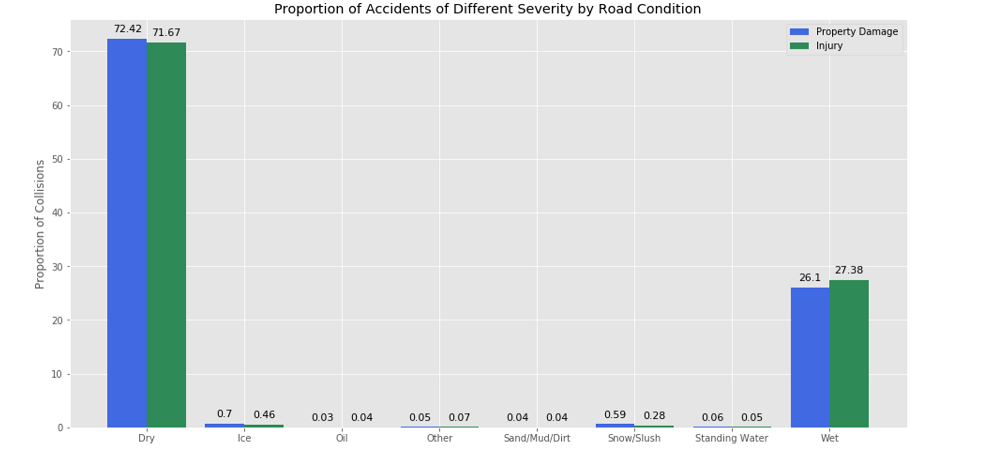

##### Light Conditions: 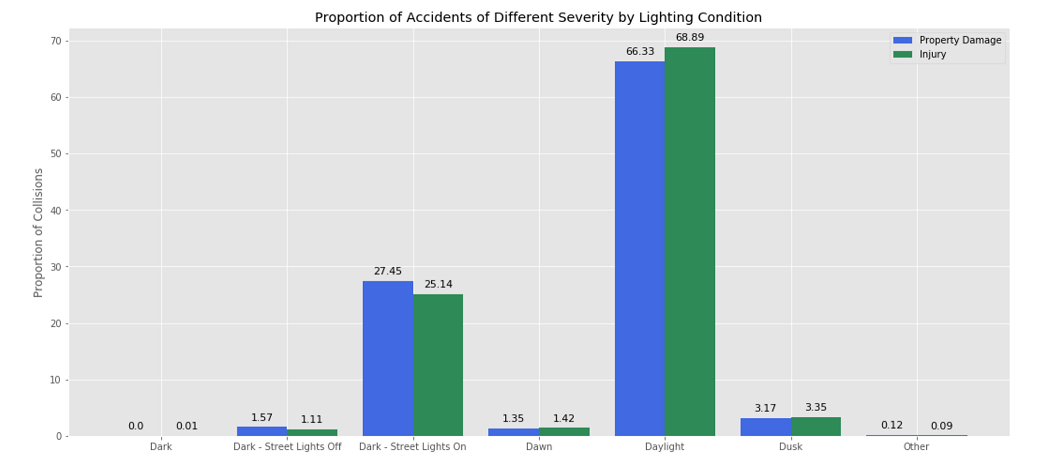

##### Weather Conditions: 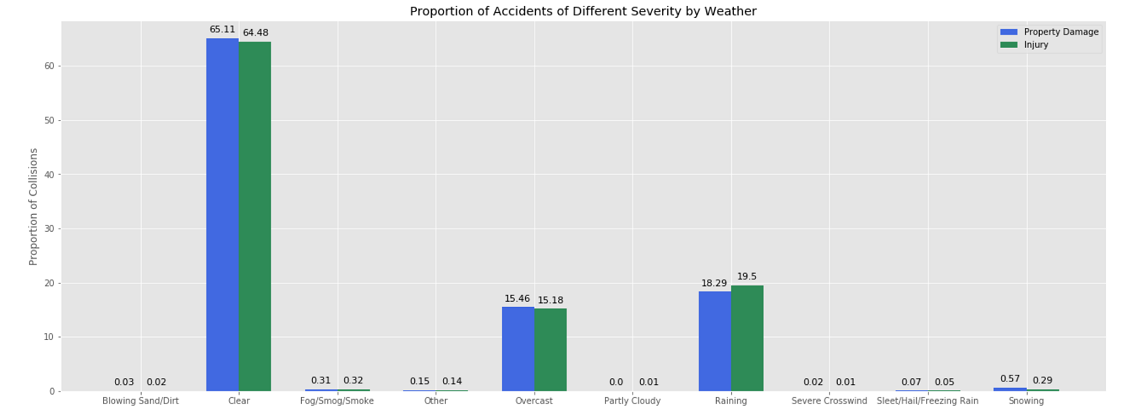

The data has a large number of values in 'normal' conditions, meaning clear weather, dry road and daylight. This results in an extremely low percentage of collisions happening in situations with bad weather, road conditions or lighting conditions. However, the graphs do show us that Injury causing accidents are more likely than Property Damaage when it is raining, or during dawn and dusk, or when the road is wet. We also find out that Property Damage is more likely when the sky is overcast or when it is dark, or when the road is slippery due to ice, snow or standing water.

#### Collision Count by Address Type and Junction Type


##### Address Type: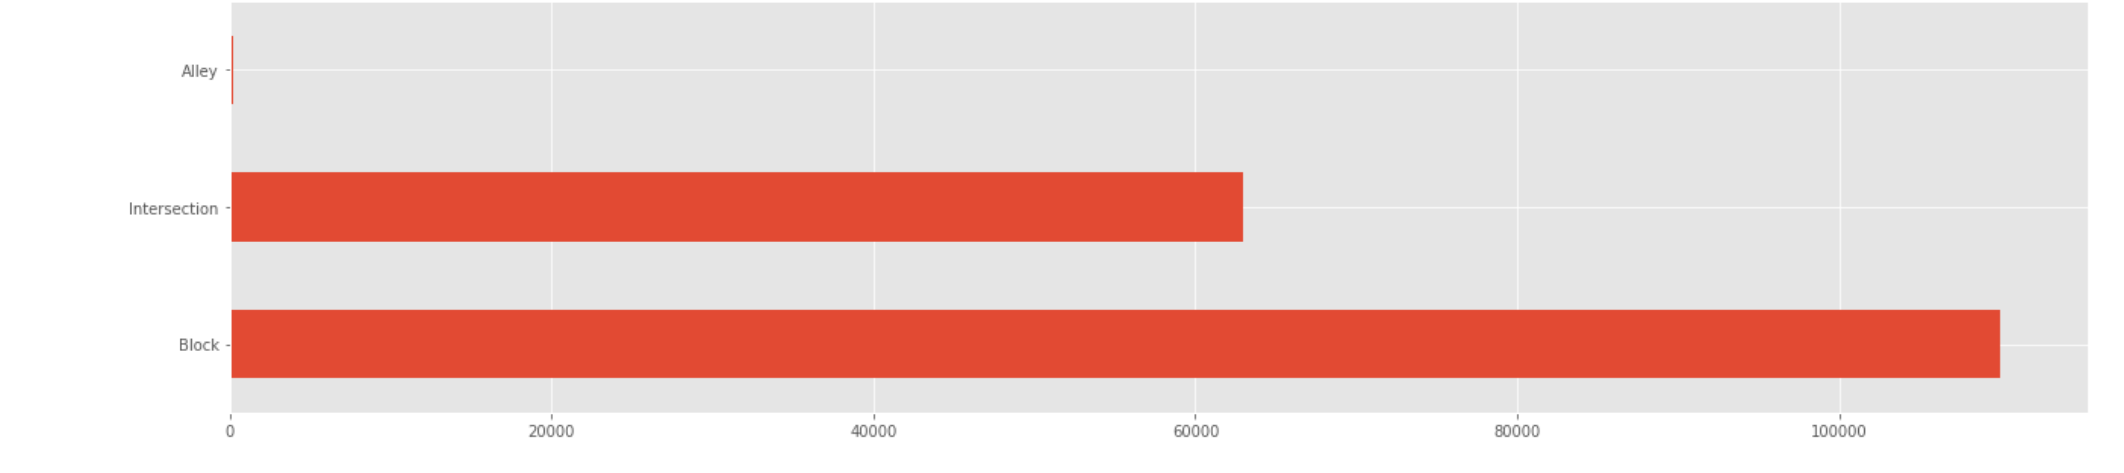

##### Junction Type: 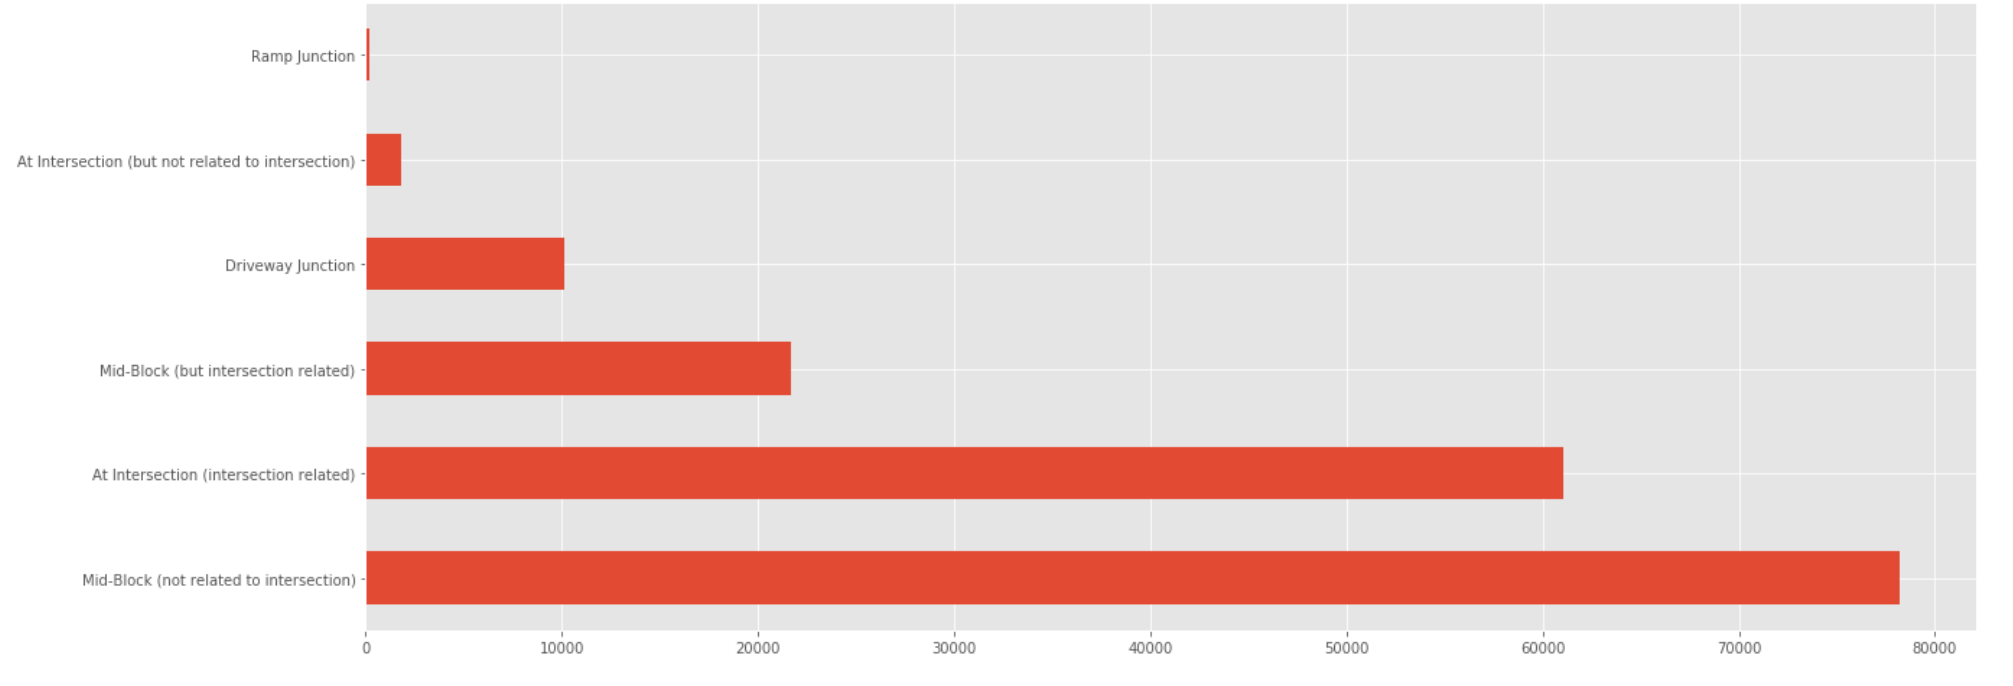

When organizing collision count by address type and junction type, the data shows that most collisons happpen at a Block, and more specifically, at Mid-Block, but not related to intersection. The second most number of collisions happen at intersections. This leads to the conclusion that more effort should be put in maintaining safety in blocks as well and not only intersections.

#### Proportion of Severity of Collision when Under the Influence or caused due to Inattentiveness

##### Under the Influence: 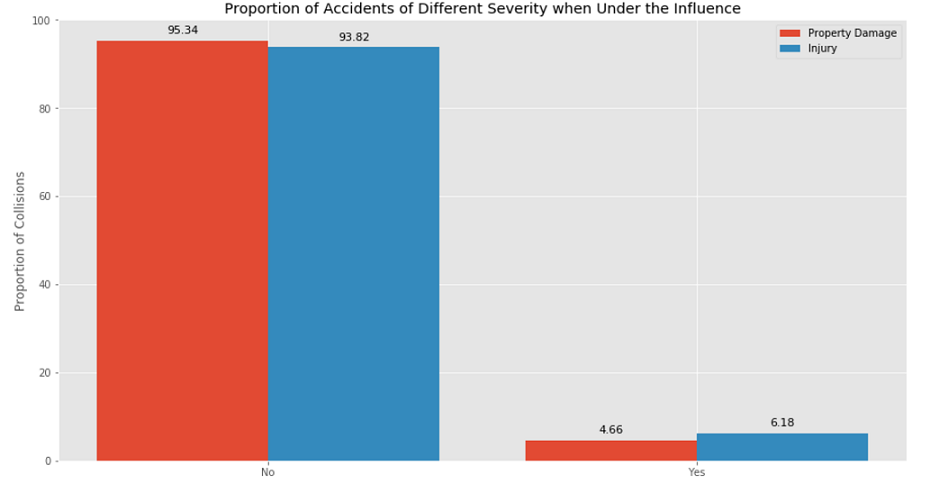

##### Inattentiveness: 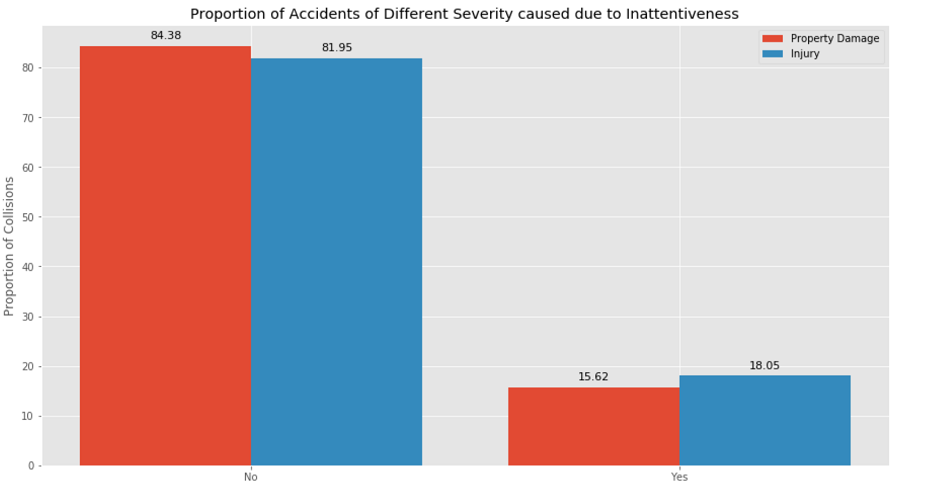

In both cases, we find that a greater percentage of collisions that cause injuries are present when either under the influence or inattentive. However, property damage is more likely when not under the influence and not inattentive. This shows that injuries are more likely to happen in an accident when either under the influence or inattentive.

#### Mapping Recent Accidents

A map of the 100 most recent accidents, organized by clusters shows that some locations and areas are more susceptible to accidents than other, possibly leading to the conclusion that more effort should be diverted in preventing accidents in these regions.

##### Pointers: 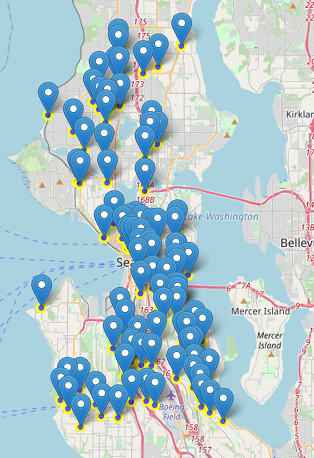

##### Clusters: 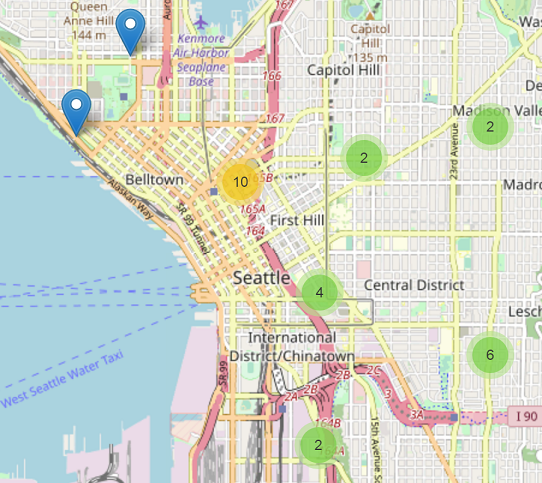

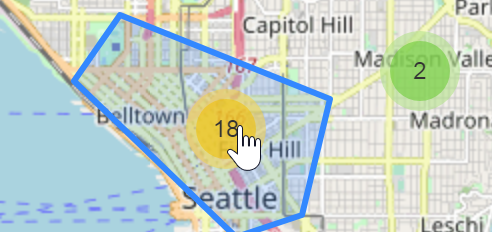

#### Reason for using proportion

The original dataframe is being used for data visualization due to the presence of text labels and exact data instead of oversampled or undersampled data. However, the original data consists of a large number of collisions of severity code 1, that is: only causing property damage. This would result in a skewed visualization with very few cases of injury every time. Thus for the purposes of visualization when considering both property damage and injury, we take the count as a proportion of the total number of collisions of that particular severity code. <br> We take: <br> 
( (number of considered collisions) / (number of collisions of the same severity code) ) *100

### 3.5 Machine Learning

#### Dropping Unnecessary Data

While ADDRTYPE and JUNCTIONTYPE are useful for the purposes of visualization, they do not have a high impact on the severity of an accident. Thus both the columns are dropped. Our final dataset takes 10 categories into consideration when predicting severity of an accident.

Fields Used: COLLISIONTYPE, PERSONCOUNT, VEHCOUNT, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, SPEEDING, HITPARKEDCAR

#### Preprocessing and Splitting the Data

The dfoversampled dataframe along with the undersampled numpy arrays are used for machine learning as they contains balanced data with equal data points of both Severity Codes. We also check with the original dataset to create a biased model. First we process and normalize the data to avoid any errors with the model using the preprocessing method from the sklearn library. Then we split the data into training or testing sets so that we can accurately gauge the accuracy of the different kinds of machine learning models. Here we use 20% of the data for testing and the remaining 80% for training.

#### Machine Learning Classification Models

We use three different models: K-Nearest Neighbors, Decision Tree, and Logistic Regression. We train each model with our training data for each case: Original Data, Oversampled Data, Undersampled Data. 

#### Model Evaluation

After training the three models, the three models are tested using the Accuracy, the Jaccard Score and the F1 score and include Log Loss for the Logistic Regression model. This is done for every dataset.

## 4. Results

The resuls of model evaluation, only showing accuracy are:
<ol>
    <li> <b>Biased Model</b>
         <ul>
            <li> K-Nearest Neighbors Accuracy: 0.72
            <li> Decision Tree Accuracy: 0.73
            <li> Logistic Regression Accuracy: 0.68
          </ul>
    <br>
    <li> <b>Oversampled Model</b>
         <ul>
            <li> K-Nearest Neighbors Accuracy: 0.67
            <li> Decision Tree Accuracy: 0.68
            <li> Logistic Regression Accuracy: 0.59
          </ul>
    <br>
    <li> <b>Undersampled Model</b>
         <ul>
            <li> K-Nearest Neighbors Accuracy: 0.70
            <li> Decision Tree Accuracy: 0.70
            <li> Logistic Regression Accuracy: 0.64
          </ul>
</ol>


The following are the detailed results of model evaluation, including Best k, Jaccard Index, F1 Score and Log Loss

<ol>
    <li> <b>Biased Model</b>
         <ol>
            <li> K-Nearest Neighbors:
                <ul> 
                    <li> Value of best k = 8
                    <li> Jaccard Score = 0.72
                    <li> F1 Score = 0.69
                </ul>
             <li> Decision Tree:
                <ul> 
                    <li> Jaccard Score = 0.73
                    <li> F1 Score = 0.69
                </ul>
             <li> Logistic Regression:
                <ul> 
                    <li> Jaccard Score = 0.68
                    <li> F1 Score = 0.60
                    <li> Log Loss = 0.61
                </ul>
          </ol>
    <br>
    <li> <b>Oversampled Model</b>
         <ol>
            <li> K-Nearest Neighbors:
                <ul> 
                    <li> Value of best k = 8
                    <li> Jaccard Score = 0.67
                    <li> F1 Score = 0.67
                </ul>
             <li> Decision Tree:
                <ul> 
                    <li> Jaccard Score = 0.68
                    <li> F1 Score = 0.68
                </ul>
             <li> Logistic Regression:
                <ul> 
                    <li> Jaccard Score = 0.59
                    <li> F1 Score = 0.59
                    <li> Log Loss = 0.66
                </ul>
          </ol>
    <br>
    <li> <b>Undersampled Model</b>
         <ol>
            <li> K-Nearest Neighbors:
                <ul> 
                    <li> Value of best k = 9
                    <li> Jaccard Score = 0.70
                    <li> F1 Score = 0.70
                </ul>
             <li> Decision Tree:
                <ul> 
                    <li> Jaccard Score = 0.70 
                    <li> F1 Score = 0.70
                </ul>
             <li> Logistic Regression:
                <ul> 
                    <li> Jaccard Score = 0.64
                    <li> F1 Score = 0.63
                    <li> Log Loss = 0.64
                </ul>
          </ol>
</ol>
               
The overall best model for predicting the severity of an accident is a biased Decision Tree with a Jaccard Score of 0.73 and an F1 score of 0.69 .<br> 
The accuracy rate of this model is 0.73.

To confirm that the best model is consistent, we look at the classification reports of the Decision Tree models.

##### Classification Report: Biased Decision Tree - 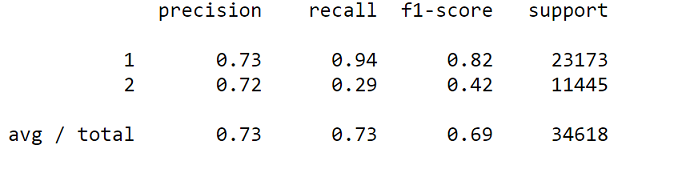

##### Classification Report: Oversampled Decision Tree - 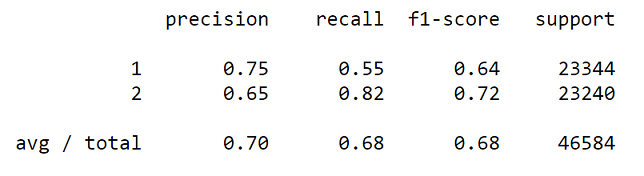

##### Classification Report: Undersampled Decision Tree - 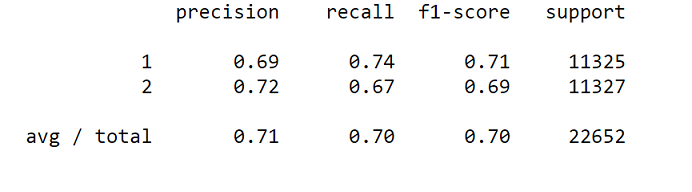

When looking at a detailed classification report, we find that going with a biased decision tree is a bad idea. This is because the classification report shows an accuracy of 0.82 when predicting a SEVERITYCODE of 1 but an accuracy of only 0.42 when predicting 2. The model is extremely biased and cannot accurately predict SEVERITYCODE 2.  
So we now compare the decision tree models of the oversampled and undersampled data. A quick look shows us that the decision tree of the undersampled data gives us the most consistent and accurate model.

Thus the __recommended model is the Decision Tree, with data being undersampled__. This has a Jaccard Score, an F1 Score and an Accuracy of __0.70__.

##### Confusion Matrix: Undersampled Decision Tree - 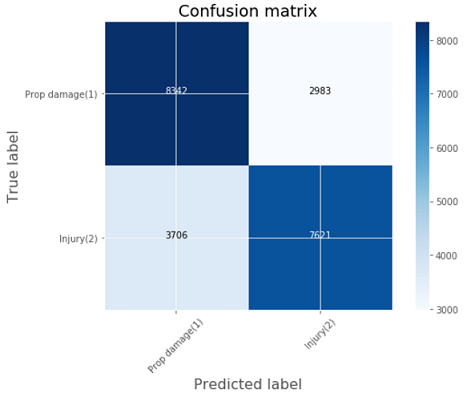

## 5. Discussion

The problem with the dataset is that it is extremely unbalanced. While the method used, or any of the other two methods do somewhat make up for it, some error is still generated when working with unbalanced data. The best way to overcome this error is by getting actually balanced data.<br>
The dataset provided also is not the complete version. It only consists of collisions of severity codes 1 and 2, whereas in actuality there are 3 codes. Using the complete dataset, hopefully a balanced one, would probably give a more accurate model. 

We also observe that a decision tree model is faster to run and outperforms both K Nearest Neighbors and Logistic Regression in terms of accuracy, even if the dataset is oversampled or undersampled.

With the existing modified dataset, the following observations can be made:
<ol>
    <li> More severe accidents are more likely to happen in cases where road conditions are slippery, during dawn or dusk, and when it is raining.
    <li> More collisions happen towards the middle of the month than at the end.
    <li> Most collsions happen mid-block, unrelated to an intersection. The second most number of accidents happen at intersections.
    <li> A greater proportion of collisions causing injury happen due to being under the influence or inattentive as compared to the ones causing property damage.
    <li> For a large dataset containing categorical data, a Decision Tree model may be the best classifier.
    <li> When the data is unbalanced, a biased model is generated, which cannot be put to use in practice. Depending on your dataset, undersampling or oversampling may counter this.
    <li> K Nearest Neighbors takes an extremely long time to train over a large number of datapoints, whereas Decision Trees and Logistic Regression are much faster.
</ol>


## 6. Conclusion

In this project I analyzed the traffic collisions in Seattle from 2004 to 2020 of varying degrees of severity. I looked at multiple factors including Road Conditions, Weather, Speeding, Inattentiveness, Location Type and Number of Vehicles/People Involved. Machine learning models are a good fit for this kind of data as they enable you to predict a particular target when given the values of the other fields. The target of prediction in this case was the severity of an accident using the other data. Using the required features, I built a multiple linear regression model, which gave poor results as expected. This was because the data was categorical and not continuous. After that, I created multiple classification models and compared their results on the regular data, oversampled data, and undersampled data for the best accuracy, which led to the finding that a Decision Tree model when using undersampled data worked best. The reason for undersampled data having higher accuracy than oversampled data could be due to the large number of data points that had to be generated to make the data oversampled (around 50,000), which left room for error. This model can be useful to regular travellers, traffic management and police, and insurance companies. For example, it could help the traffic police analyse when and in what conditions collisions of higher severity are likely to occur, and take steps to prevent it beforehand.
